In [2]:

from pytket.circuit.display import render_circuit_jupyter
from pytket.extensions.quantinuum import QuantinuumBackend
import matplotlib.pyplot as pl

import os
print(os.getcwd())

from pytket.backends.backendresult import BackendResult

# %matplotlib qt5
import pickle
import pandas as pd
import numpy as np

/Users/utkarshagrawal/Documents/Postdoc/U_1_exp/Quantinum/Weak measurements


In [2]:
machine = 'H1-1E'
backend = QuantinuumBackend(machine)
# backend.login()

print(machine, "status:", backend.device_state(device_name=machine))

H1-1E status: online


In [4]:
depth_label = '_depth_ratio=0.5'

In [5]:
file = 'data/compiled_circuits_multiple_ancillas' + depth_label
with open(file,'rb') as f:
    compiled_circuits = pickle.load(f)

In [6]:
p_to_run = [0.157,0.381,0.718,0.987,1.122]
L_to_run = [6,8,10,12,14]
n_shots = 400

In [5]:

filename = 'cost_dic'+depth_label
if not os.path.isfile(filename):
    HQC = {}
    for L,depth,p,Q in compiled_circuits:
        if L not in L_to_run:
            continue
        if p not in p_to_run:
            continue
        circ = compiled_circuits[(L,depth,p,Q)]
        HQC[(L,p,Q)] = backend.cost(circ, n_shots=n_shots, syntax_checker='H1-1SC')
    with open(filename,'wb') as f:
        pickle.dump(HQC,f)
else:
    with open(filename,'rb') as f:
        HQC = pickle.load(f)

In [17]:
Ls = np.array([6,10,14])
shots = np.array([100,100,100])/400
gamma_points = np.array([0,2,2])/5
aa = np.array([np.sum([HQC[(L,p,Q)] for (L,p,Q) in HQC if L==i]) for i in Ls])
aa = aa*gamma_points*shots
print(aa,np.cumsum(aa[:]))

[  0.    217.344 394.392] [  0.    217.344 611.736]


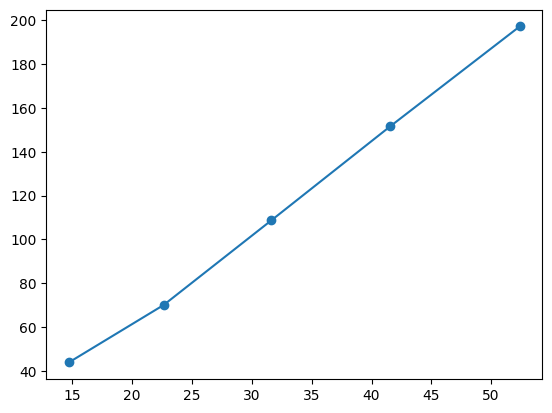

In [70]:
pl.plot(Ls**1.5,aa,'-o')
# pl.yscale('log')
# pl.xscale('log')